 # <center> <font color=Red>Compte rendu TP4: Decision Tree Classification in Python</font></center>

 <font color=red>Réalisé par :   Eddai Ines  </font>  
                           
 <font color=black >3DNI_G1 </font> <p>
<font color=green>Année universitaire : 2020/2021</font>

# Decision Tree Classification in Python

## Importing Required Libraries

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## Loading Data

Let's first load the required Pima Indian Diabetes dataset using pandas' read CSV function.

You can download the data [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv('https://raw.githubusercontent.com/nevermind78/DM/master/TP4/diabetes.csv', header=None, names=col_names).drop([0])

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


### The output should be :
![alt text](pima.png)


### Feature Selection
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [4]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

### Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### Building Decision Tree Model
Let's create a Decision Tree Model using Scikit-learn.

In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model
Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [7]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6883116883116883


Accuracy: 0.6753246753246753

### Visualizing Decision Trees
You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.

`pip install graphviz`

`pip install pydotplus`

`export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.`

In [8]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


C:\Users\HP\anaconda3\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


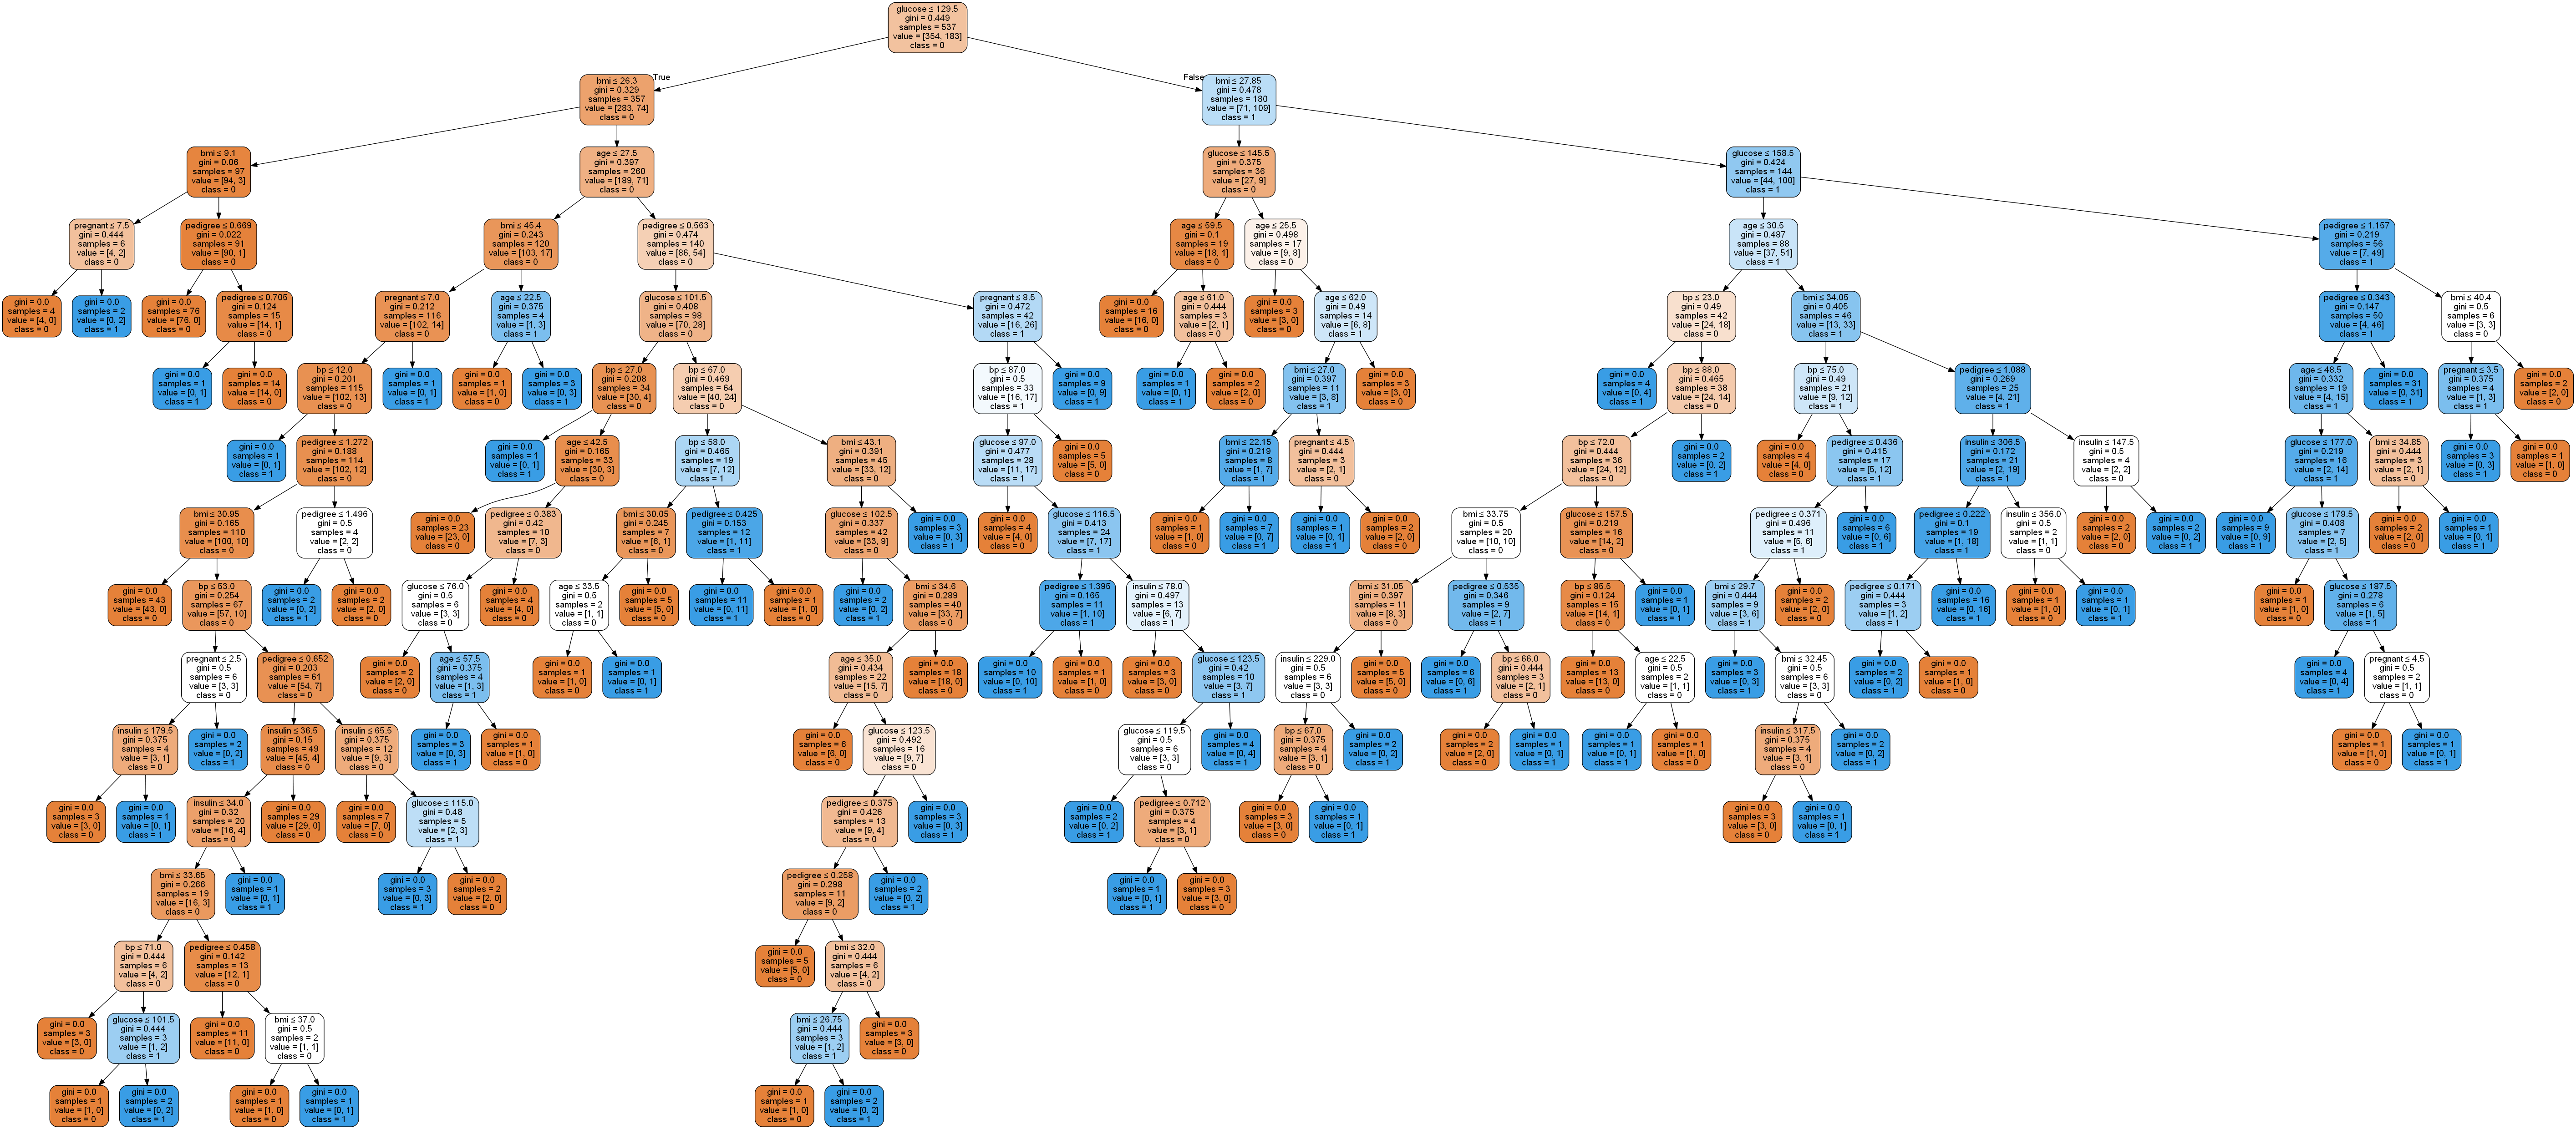

In [10]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  

from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

### The output should be :
![alt text](output.jpg)


### Optimizing Decision Tree Performance
* **criterion :** `optional (default=”gini”) or Choose attribute selection measure`: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

* **splitter :** `string, optional (default=”best”) or Split Strategy`: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

* **max_depth** : `int or None, optional (default=None) or Maximum Depth of a Tree`: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.

In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


Accuracy: 0.7705627705627706

### Visualizing Decision Trees

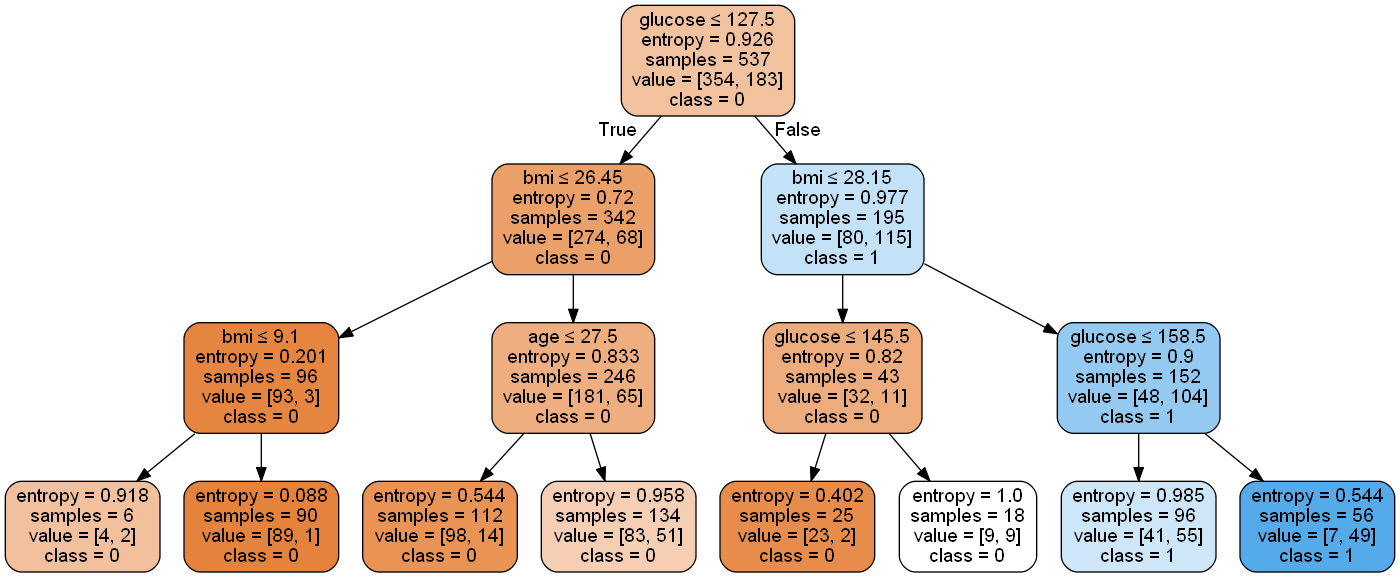

In [12]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

### The output should be :
![alt text](output2.png)

### Pros

Les arbres de décision présentent un certain nombre d'avantages en tant qu'outil de gestion pratique et utile.

Complet

Un avantage significatif d'un arbre de décision est qu'il force la prise en compte de tous les résultats possibles d'une décision et trace chaque chemin vers une conclusion. Il crée une analyse complète des conséquences le long de chaque branche et identifie les nœuds de décision qui nécessitent une analyse plus approfondie.

Spécifique

Les arbres de décision attribuent des valeurs spécifiques à chaque problème, chemin de décision et résultat. L'utilisation de valeurs monétaires rend les coûts et les avantages explicites. Cette approche identifie les voies de décision pertinentes, réduit l'incertitude, dissipe l'ambiguïté et clarifie les conséquences financières des différentes pistes d'action.

Lorsque les informations factuelles ne sont pas disponibles, les arbres de décision utilisent des probabilités pour les conditions pour garder les choix en perspective les uns avec les autres pour des comparaisons faciles.

Facile à utiliser

Les arbres de décision sont faciles à utiliser et à expliquer avec des mathématiques simples, sans formules complexes. Ils présentent visuellement toutes les alternatives de décision pour des comparaisons rapides dans un format facile à comprendre avec seulement de brèves explications.

Ils sont intuitifs et suivent le même schéma de pensée que les humains utilisent lorsqu'ils prennent des décisions.

Polyvalent

Une multitude de problèmes commerciaux peuvent être analysés et résolus par des arbres de décision. Ce sont des outils utiles pour les chefs d'entreprise, les techniciens, les ingénieurs, le personnel médical et toute autre personne devant prendre des décisions dans des conditions incertaines.

L'algorithme d'un arbre de décision peut être intégré à d'autres outils d'analyse de gestion tels que la valeur actuelle nette et la technique d'examen de l'évaluation de projet (PERT).

Des arbres de décision simples peuvent être construits manuellement ou utilisés avec des programmes informatiques pour des diagrammes plus complexes.

Les arbres de décision sont une technique de bon sens pour trouver les meilleures solutions aux problèmes d'incertitude. 

### Cons

* La plupart des algorithmes (comme ID3 et C4.5) exigent que l'attribut cible
n'ont que des valeurs discrètes.
* Comme les arbres de décision utilisent la méthode «diviser pour vaincre», ils ont tendance à
bien s'il existe quelques attributs hautement pertinents, mais moins si beaucoup
les interactions sont présentes. L'une des raisons à cela est que d'autres classificateurs peuvent
décrire de manière compacte un classificateur qui serait très difficile à représenter
en utilisant un arbre de décision.
* La caractéristique gourmande des arbres de décision conduit à un autre inconvénient qui
doit être souligné. C'est sa sensibilité excessive à l'ensemble d'entraînement, à attributs non pertinents et au bruit.

### Conclusion

Un arbre de décision est le meilleur modèle prédictif. Il trouve utile de faire une analyse quantitative des problèmes commerciaux et de valider les résultats des tests statistiques. Il prend naturellement en charge les problèmes de classification avec plus de deux classes et, par modification, gère les problèmes de régression.

Les modèles d'arbre de décision sophistiqués mis en œuvre à l'aide d'applications logicielles personnalisées peuvent utiliser des données historiques pour appliquer une analyse statistique et faire des prédictions concernant la probabilité d'événements. Par exemple, l'analyse de l'arbre de décision aide à améliorer la capacité de prise de décision des banques commerciales en attribuant la probabilité de succès et d'échec aux données de candidature pour identifier les emprunteurs qui ne répondent pas aux critères traditionnels de normes minimales fixés pour les emprunteurs, mais qui sont statistiquement inférieurs. susceptibles de faire défaut que les candidats qui satisfont à toutes les exigences minimales.